In [104]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
# Load the data
df = pd.read_csv('global_food_wastage_dataset_cleaned.csv')

In [106]:
# Import ML libraries (minimal)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Model 1: Predicting Total Waste (Tons)
models_waste = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
waste_results = {}
for name, model in models_waste.items():
    if name == 'Linear Regression':
        model.fit(X_train_w_scaled, y_train_w)
        y_pred = model.predict(X_test_w_scaled)
    else:
        model.fit(X_train_w, y_train_w)
        y_pred = model.predict(X_test_w)
    mse = mean_squared_error(y_test_w, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_w, y_pred)
    if name == 'Linear Regression':
        cv_scores = cross_val_score(model, X_train_w_scaled, y_train_w, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train_w, y_train_w, cv=5, scoring='r2')
    waste_results[name] = {'RMSE': rmse, 'R2': r2, 'model': model, 'predictions': y_pred}
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.4f}")
best_waste_model = min(waste_results.items(), key=lambda x: x[1]['RMSE'])
print(f"Best Waste Model: {best_waste_model[0]} (RMSE={best_waste_model[1]['RMSE']:.2f})")

Linear Regression: RMSE=3009.40, R2=0.9514
Decision Tree: RMSE=4184.52, R2=0.9061
Random Forest: RMSE=2958.71, R2=0.9530
Best Waste Model: Random Forest (RMSE=2958.71)


In [108]:
# Model 2: Predicting Economic Loss (Million $)
models_economic = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
economic_results = {}
for name, model in models_economic.items():
    if name == 'Linear Regression':
        model.fit(X_train_e_scaled, y_train_e)
        y_pred = model.predict(X_test_e_scaled)
    else:
        model.fit(X_train_e, y_train_e)
        y_pred = model.predict(X_test_e)
    mse = mean_squared_error(y_test_e, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_e, y_pred)
    if name == 'Linear Regression':
        cv_scores = cross_val_score(model, X_train_e_scaled, y_train_e, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train_e, y_train_e, cv=5, scoring='r2')
    economic_results[name] = {'RMSE': rmse, 'R2': r2, 'model': model, 'predictions': y_pred}
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.4f}")
best_economic_model = min(economic_results.items(), key=lambda x: x[1]['RMSE'])
print(f"Best Economic Model: {best_economic_model[0]} (RMSE={best_economic_model[1]['RMSE']:.2f})")

Linear Regression: RMSE=3059.29, R2=0.9515
Decision Tree: RMSE=4585.58, R2=0.8909
Random Forest: RMSE=3226.94, R2=0.9460
Best Economic Model: Linear Regression (RMSE=3059.29)


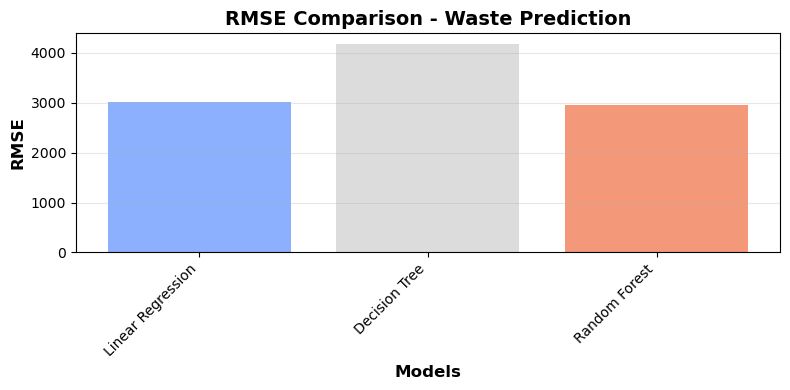

In [109]:
# Plot 1: RMSE Comparison - Waste Prediction
fig, ax = plt.subplots(figsize=(8,4))
waste_rmse = [waste_results[m]['RMSE'] for m in models_waste.keys()]
x_pos = np.arange(len(models_waste.keys()))
ax.bar(x_pos, waste_rmse, color=sns.color_palette('coolwarm', len(models_waste)))
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax.set_title('RMSE Comparison - Waste Prediction', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models_waste.keys(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


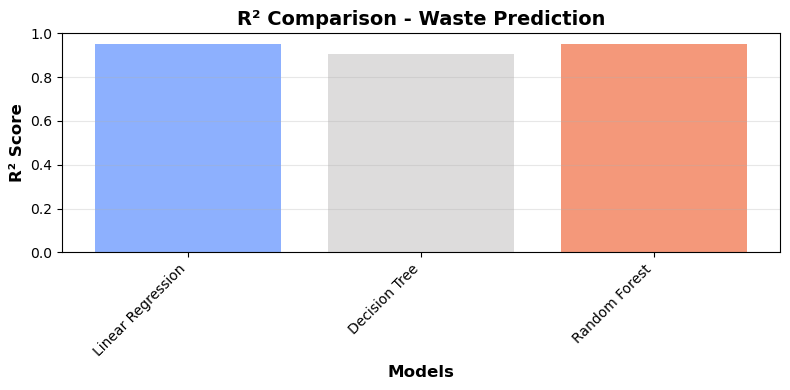

In [110]:
# Plot 2: R² Comparison - Waste Prediction
fig, ax = plt.subplots(figsize=(8,4))
waste_r2 = [waste_results[m]['R2'] for m in models_waste.keys()]
x_pos = np.arange(len(models_waste.keys()))
ax.bar(x_pos, waste_r2, color=sns.color_palette('coolwarm', len(models_waste)))
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax.set_title('R² Comparison - Waste Prediction', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models_waste.keys(), rotation=45, ha='right')
ax.set_ylim([0,1])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


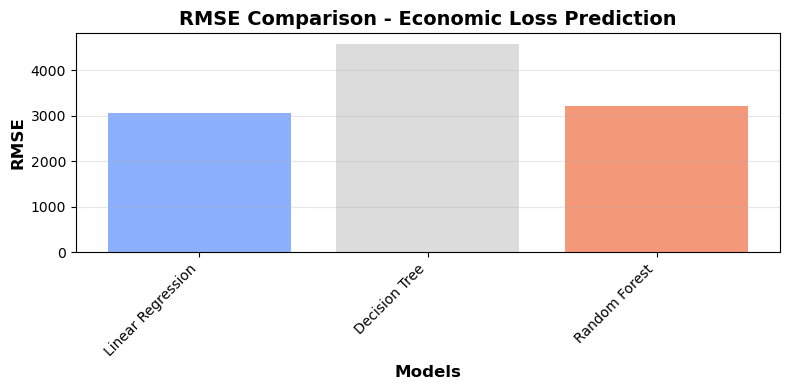

In [111]:
# Plot 3: RMSE Comparison - Economic Loss Prediction
fig, ax = plt.subplots(figsize=(8,4))
economic_rmse = [economic_results[m]['RMSE'] for m in models_economic.keys()]
x_pos = np.arange(len(models_economic.keys()))
ax.bar(x_pos, economic_rmse, color=sns.color_palette('coolwarm', len(models_economic)))
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax.set_title('RMSE Comparison - Economic Loss Prediction', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models_economic.keys(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


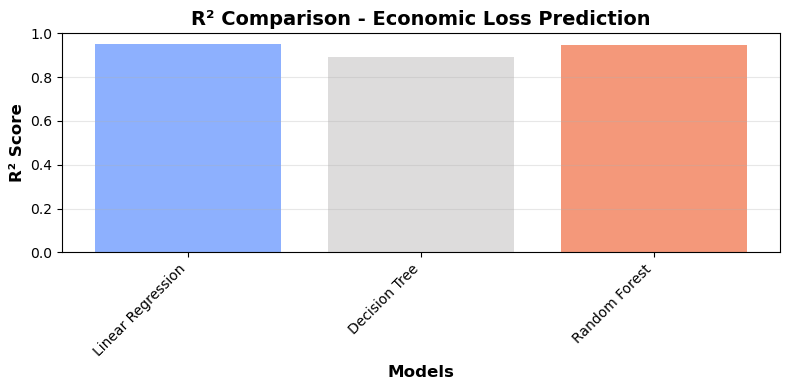

In [112]:
# Plot 4: R² Comparison - Economic Loss Prediction
fig, ax = plt.subplots(figsize=(8,4))
economic_r2 = [economic_results[m]['R2'] for m in models_economic.keys()]
x_pos = np.arange(len(models_economic.keys()))
ax.bar(x_pos, economic_r2, color=sns.color_palette('coolwarm', len(models_economic)))
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax.set_title('R² Comparison - Economic Loss Prediction', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models_economic.keys(), rotation=45, ha='right')
ax.set_ylim([0,1])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [113]:
# Feature Importance Analysis (split into two cells below)
# Cell 1 plots Waste feature importance; Cell 2 plots Economic feature importance


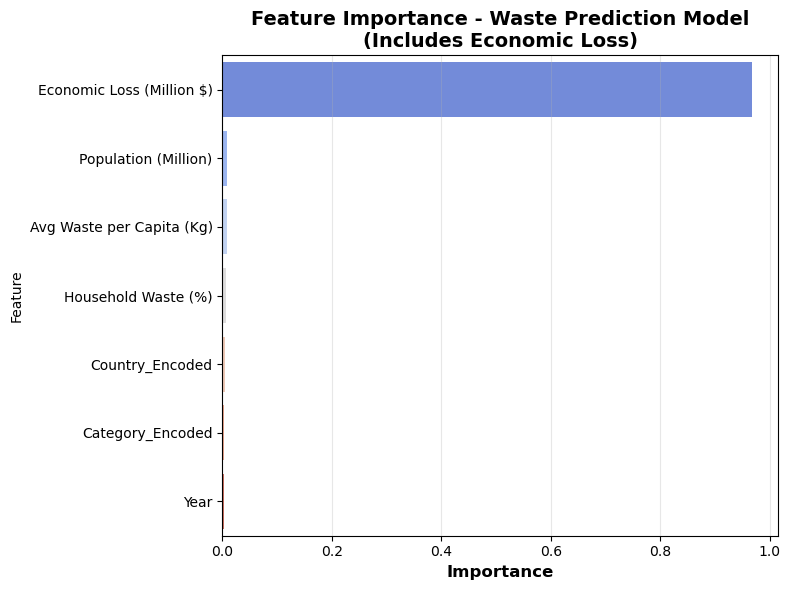


Waste Prediction (includes Economic Loss as feature):
                  Feature  Importance
Economic Loss (Million $)    0.966606
     Population (Million)    0.007549
Avg Waste per Capita (Kg)    0.007517
      Household Waste (%)    0.007375
          Country_Encoded    0.004886
         Category_Encoded    0.003206
                     Year    0.002862


In [114]:
# Feature importance for Waste model (using Random Forest)
rf_waste = waste_results['Random Forest']['model']
feature_importance_waste = pd.DataFrame({
    'Feature': feature_cols_waste,
    'Importance': rf_waste.feature_importances_
}).sort_values('Importance', ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=feature_importance_waste, x='Importance', y='Feature', ax=ax, palette='coolwarm')
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance - Waste Prediction Model\n(Includes Economic Loss)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()
print("\nWaste Prediction (includes Economic Loss as feature):")
print(feature_importance_waste.to_string(index=False))

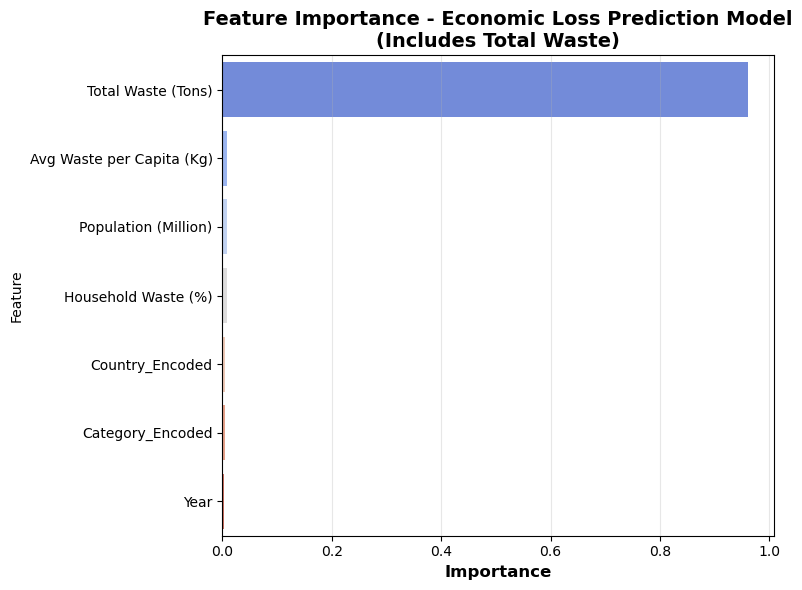


Economic Loss Prediction (includes Total Waste as feature):
                  Feature  Importance
       Total Waste (Tons)    0.960124
Avg Waste per Capita (Kg)    0.009289
     Population (Million)    0.008746
      Household Waste (%)    0.008701
          Country_Encoded    0.005491
         Category_Encoded    0.003970
                     Year    0.003679


In [115]:
# Feature importance for Economic Loss model (using Random Forest)
rf_economic = economic_results['Random Forest']['model']
feature_importance_economic = pd.DataFrame({
    'Feature': feature_cols_economic,
    'Importance': rf_economic.feature_importances_
}).sort_values('Importance', ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=feature_importance_economic, x='Importance', y='Feature', ax=ax, palette='coolwarm')
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance - Economic Loss Prediction Model\n(Includes Total Waste)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()
print("\nEconomic Loss Prediction (includes Total Waste as feature):")
print(feature_importance_economic.to_string(index=False))

In [116]:
# Timing: measure average training time (3 runs), RMSE and R² for each model and target
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def time_models_for_target(df, target, repeats=3):
    X = df.select_dtypes(include=[np.number]).drop(columns=[target], errors='ignore').fillna(0)
    # drop obvious identifier/year columns if present
    drop_cols = [c for c in ['Year','year','ID','Id','id','Country','country','Country Code','country_code'] if c in X.columns]
    if drop_cols:
        X = X.drop(columns=drop_cols, errors='ignore')
    y = df[target].fillna(0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    rows = []
    for name, model in models.items():
        times = []
        for _ in range(repeats):
            t0 = time.time()
            model.fit(X_train, y_train)
            t1 = time.time()
            times.append(t1 - t0)
        avg_time = sum(times) / len(times)
        y_pred = model.predict(X_test)
        rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2 = float(r2_score(y_test, y_pred))
        rows.append({
            'Model': name,
            'Target': target,
            'Training Time (s)': round(avg_time, 6),
            'RMSE': round(rmse, 4),
            'R2': round(r2, 4)
        })
    return pd.DataFrame(rows)

# Targets to time (will only run if present in `df`)
targets = ['Total Waste (Tons)', 'Economic Loss (Million $)']
results = []
for t in targets:
    if t in df.columns:
        print(f"Timing models for target: {t}")
        results.append(time_models_for_target(df, t, repeats=3))
    else:
        print(f"Target not found in dataframe: {t}")

if results:
    summary = pd.concat(results, ignore_index=True)
    display(summary)
else:
    print('No timing results (no targets found).')

Timing models for target: Total Waste (Tons)
Timing models for target: Economic Loss (Million $)


,Model,Target,Training Time (s),RMSE,R2
0,Linear Regression,Total Waste (Tons),0.001837,3007.6808,0.9515
1,Decision Tree,Total Waste (Tons),0.019359,4191.0318,0.9058
2,Random Forest,Total Waste (Tons),1.194701,2993.4932,0.9519
3,Linear Regression,Economic Loss (Million $),0.002219,3058.5823,0.9515
4,Decision Tree,Economic Loss (Million $),0.018935,4605.9370,0.8900
5,Random Forest,Economic Loss (Million $),1.240257,3275.2458,0.9444


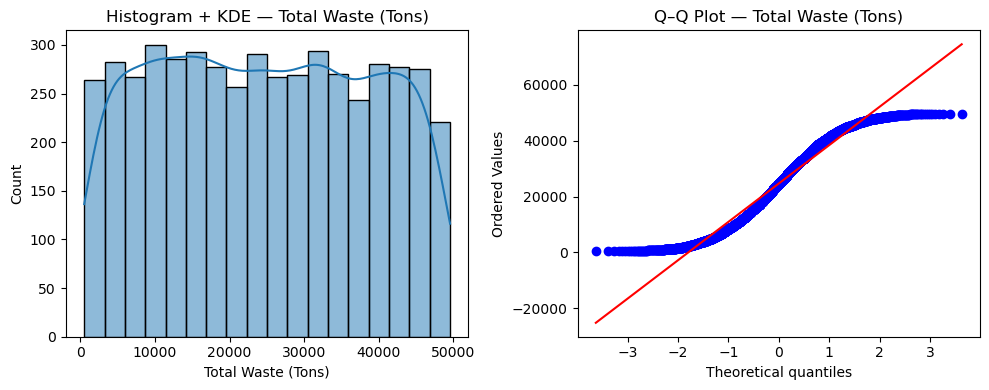

Total Waste (Tons) — Shapiro-Wilk: stat=0.9562, p=4.521e-36


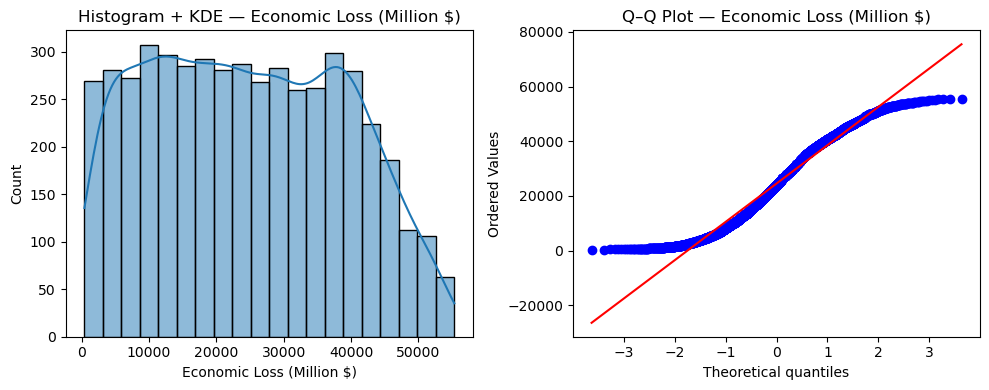

Economic Loss (Million $) — Shapiro-Wilk: stat=0.9659, p=1.418e-32


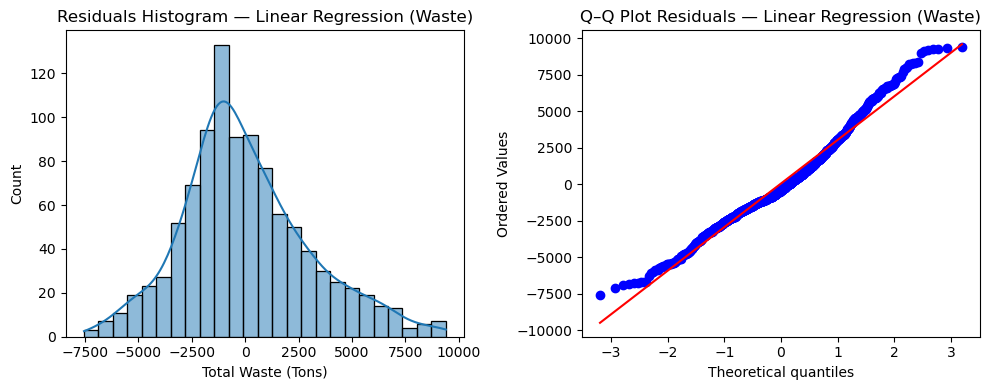

Residuals Linear Regression (Waste) — Shapiro-Wilk: stat=0.9775, p=3.375e-11


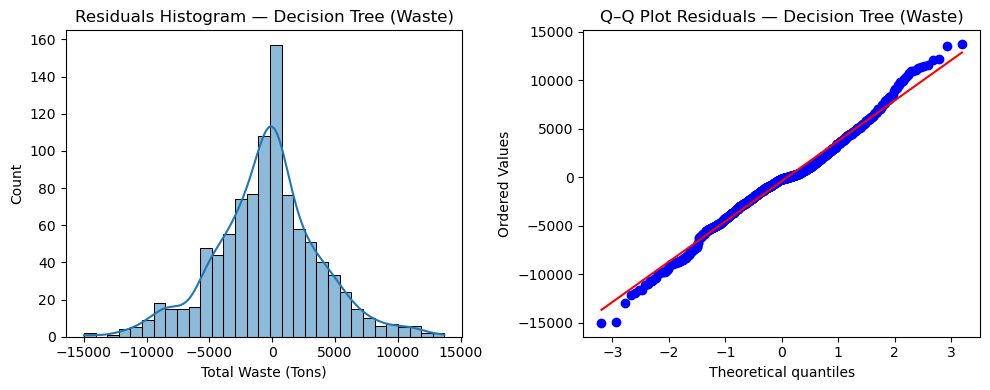

Residuals Decision Tree (Waste) — Shapiro-Wilk: stat=0.9873, p=1.561e-07


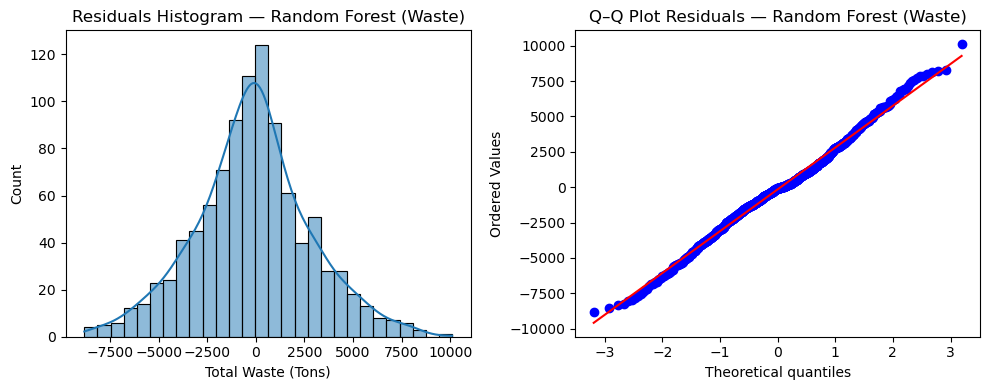

Residuals Random Forest (Waste) — Shapiro-Wilk: stat=0.9936, p=0.0003341


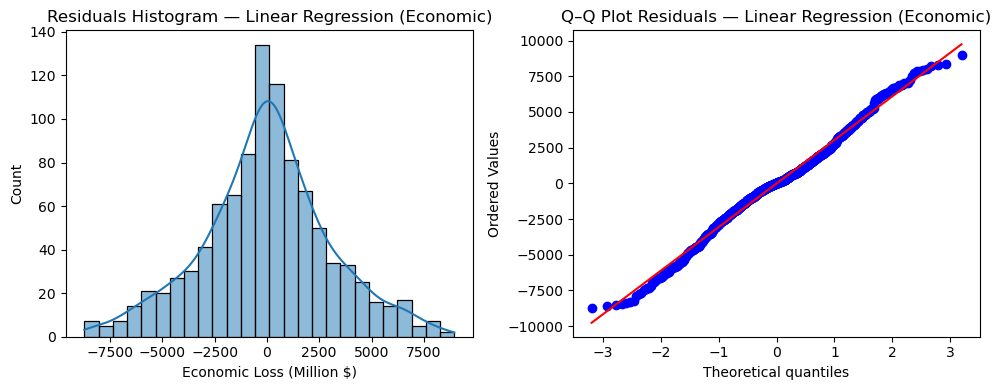

Residuals Linear Regression (Economic) — Shapiro-Wilk: stat=0.9911, p=1.129e-05


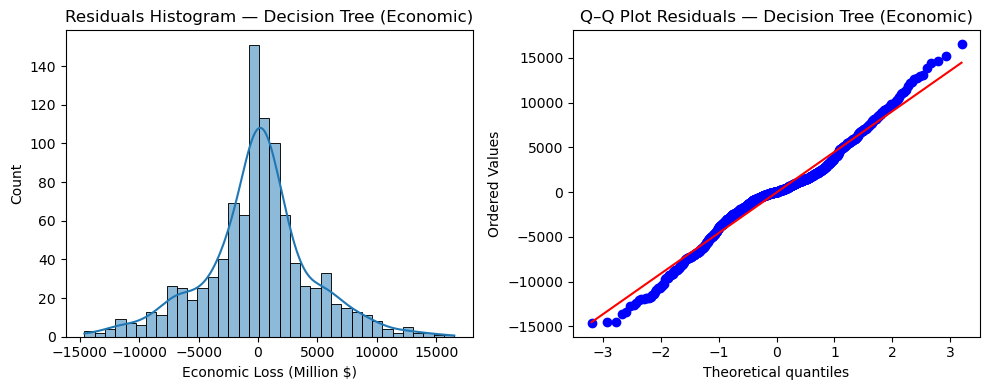

Residuals Decision Tree (Economic) — Shapiro-Wilk: stat=0.9754, p=7.357e-12


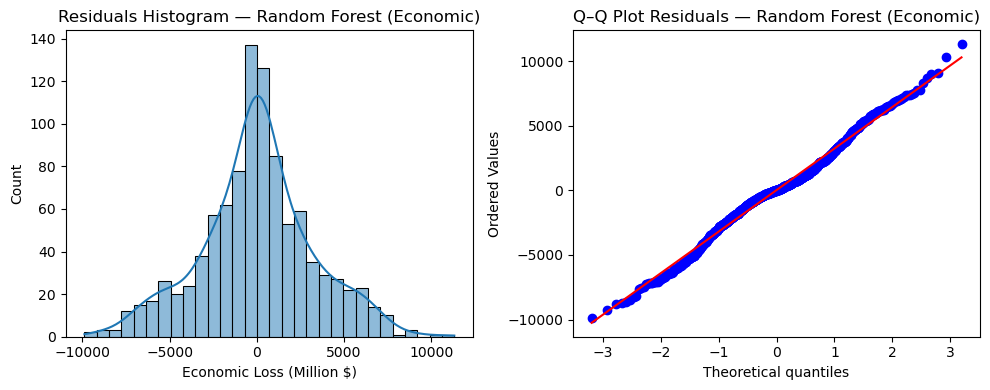

Residuals Random Forest (Economic) — Shapiro-Wilk: stat=0.9891, p=1.095e-06


In [117]:
# Normality checks: Q-Q plots, histograms and tests for targets and residuals
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

targets = ['Total Waste (Tons)', 'Economic Loss (Million $)']
for t in targets:
    if t in df.columns:
        data = df[t].dropna()
        fig, axes = plt.subplots(1,2, figsize=(10,4))
        sns.histplot(data, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram + KDE — {t}')
        stats.probplot(data, dist='norm', plot=axes[1])
        axes[1].set_title(f'Q–Q Plot — {t}')
        plt.tight_layout()
        plt.show()
        try:
            if len(data) <= 5000:
                stat, p = stats.shapiro(data)
                print(f'{t} — Shapiro-Wilk: stat={stat:.4f}, p={p:.4g}')
            else:
                stat, p = stats.normaltest(data)
                print(f
)
        except Exception as e:
            print(f'Could not run normality test for {t}: {e}')
    else:
        print(f'{t} not found in dataframe')

# If residuals from the trained models are available, check their normality too
if 'waste_results' in globals() and 'y_test_w' in globals():
    for name, info in waste_results.items():
        preds = info.get('predictions', None)
        if preds is None:
            continue
        res = (y_test_w - preds).dropna() if hasattr(y_test_w, 'dropna') else y_test_w - preds
        fig, axes = plt.subplots(1,2, figsize=(10,4))
        sns.histplot(res, kde=True, ax=axes[0])
        axes[0].set_title(f'Residuals Histogram — {name} (Waste)')
        stats.probplot(res, dist='norm', plot=axes[1])
        axes[1].set_title(f'Q–Q Plot Residuals — {name} (Waste)')
        plt.tight_layout()
        plt.show()
        try:
            if len(res) <= 5000:
                s,p = stats.shapiro(res)
                print(f'Residuals {name} (Waste) — Shapiro-Wilk: stat={s:.4f}, p={p:.4g}')
            else:
                s,p = stats.normaltest(res)
                print(f'Residuals {name} (Waste) — DAgostino K^2: stat={s:.4f}, p={p:.4g}')
        except Exception as e:
            print(f'Could not run residual normality test for {name} (Waste): {e}')

if 'economic_results' in globals() and 'y_test_e' in globals():
    for name, info in economic_results.items():
        preds = info.get('predictions', None)
        if preds is None:
            continue
        res = (y_test_e - preds).dropna() if hasattr(y_test_e, 'dropna') else y_test_e - preds
        fig, axes = plt.subplots(1,2, figsize=(10,4))
        sns.histplot(res, kde=True, ax=axes[0])
        axes[0].set_title(f'Residuals Histogram — {name} (Economic)')
        stats.probplot(res, dist='norm', plot=axes[1])
        axes[1].set_title(f'Q–Q Plot Residuals — {name} (Economic)')
        plt.tight_layout()
        plt.show()
        try:
            if len(res) <= 5000:
                s,p = stats.shapiro(res)
                print(f'Residuals {name} (Economic) — Shapiro-Wilk: stat={s:.4f}, p={p:.4g}')
            else:
                s,p = stats.normaltest(res)
                print(f'Residuals {name} (Economic) — DAgostino K^2: stat={s:.4f}, p={p:.4g}')
        except Exception as e:
            print(f'Could not run residual normality test for {name} (Economic): {e}')